# Time Series - Exploration Exercise

**Make subplots where each is plotting sales over different periods (daily, weekly, monthly, e.g.). The sales should be grouped by store (color to represent store).**

In [1]:
import acquire
import prepare

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import functools as ft

In [2]:
df = acquire.get_product_info()

Reading items.csv . . . .
Reading stores.csv . . . .
Reading sales.csv . . . .


In [3]:
df = prepare.prep_store_data(df)

In [4]:
df.head()

,sale_quantity,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,year,quarter,month,day,weekday,is_weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,2013,1,1,1,Tue,True,10.92
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,2013,1,1,1,Tue,True,218.40
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,2013,1,1,1,Tue,True,125.55
2013-01-01 00:00:00+00:00,54.0,213643,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,8,TX,78232,2013,1,1,1,Tue,True,453.60
2013-01-01 00:00:00+00:00,35.0,215469,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,9,TX,78221,2013,1,1,1,Tue,True,294.00


## FIESTA COLORS!

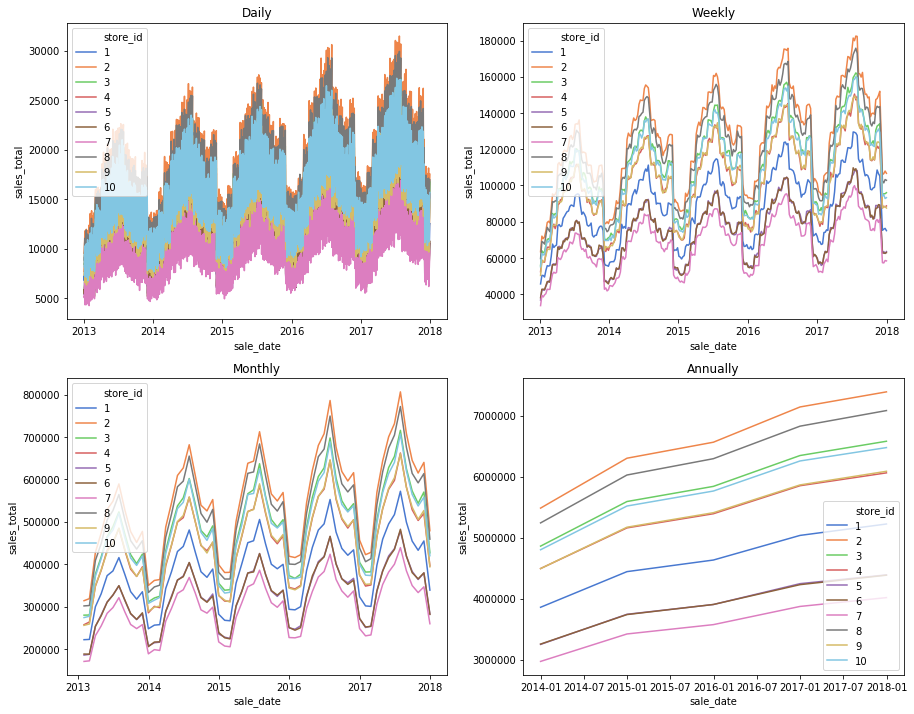

In [5]:
# df_sales = df.groupby("store_id").resample("A").sales_total.sum().reset_index()

pal = sns.color_palette("muted", 10)
ts_plot_store = ft.partial(sns.lineplot, x="sale_date", y="sales_total", hue="store_id", palette=pal)

plt.figure(figsize=(15, 12))
freqs = {"D": "Daily", "W": "Weekly", "M": "Monthly", "A": "Annually"}
for i, freq in enumerate(freqs):
    plt.subplot(2, 2, i + 1)
    df_sales = df.groupby("store_id").resample(freq).sales_total.sum().reset_index()
    plt.title(freqs[freq])
    ts_plot_store(data=df_sales)

plt.show()

**I want to see the number of each type of item that are sold over time for each store. Find a way to chart this. Hints: subplots for the piece with the fewest distinct values (like store), x = time, y = count, color = item. If you have too many distinct items, you may need to plot the top n, while aggregating the others into an 'other' bucket.**

In [6]:
df_items = df.groupby(["item_id", "store_id"]).resample("D").sale_quantity.sum().reset_index()

In [7]:
df_items.head()

,item_id,store_id,sale_date,sale_quantity
0,1,1,2013-01-01 00:00:00+00:00,13.0
1,1,1,2013-01-02 00:00:00+00:00,11.0
2,1,1,2013-01-03 00:00:00+00:00,14.0
3,1,1,2013-01-04 00:00:00+00:00,13.0
4,1,1,2013-01-05 00:00:00+00:00,10.0


In [8]:
df_items_store1 = df_items[df_items.store_id == 1]

In [9]:
df_items_store1.head()

,item_id,store_id,sale_date,sale_quantity
0,1,1,2013-01-01 00:00:00+00:00,13.0
1,1,1,2013-01-02 00:00:00+00:00,11.0
2,1,1,2013-01-03 00:00:00+00:00,14.0
3,1,1,2013-01-04 00:00:00+00:00,13.0
4,1,1,2013-01-05 00:00:00+00:00,10.0


In [10]:
df_items.store_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [11]:
df_items_store1.groupby("item_id").sale_quantity.sum().sort_values(ascending=False)[0:5].index.values

array([15, 28, 18, 13, 38])

In [12]:
df_items_store1.groupby("item_id").sale_quantity.sum().sort_values(ascending=False).head()

item_id
15    145497.0
28    145289.0
18    139407.0
13    139067.0
38    133927.0
Name: sale_quantity, dtype: float64

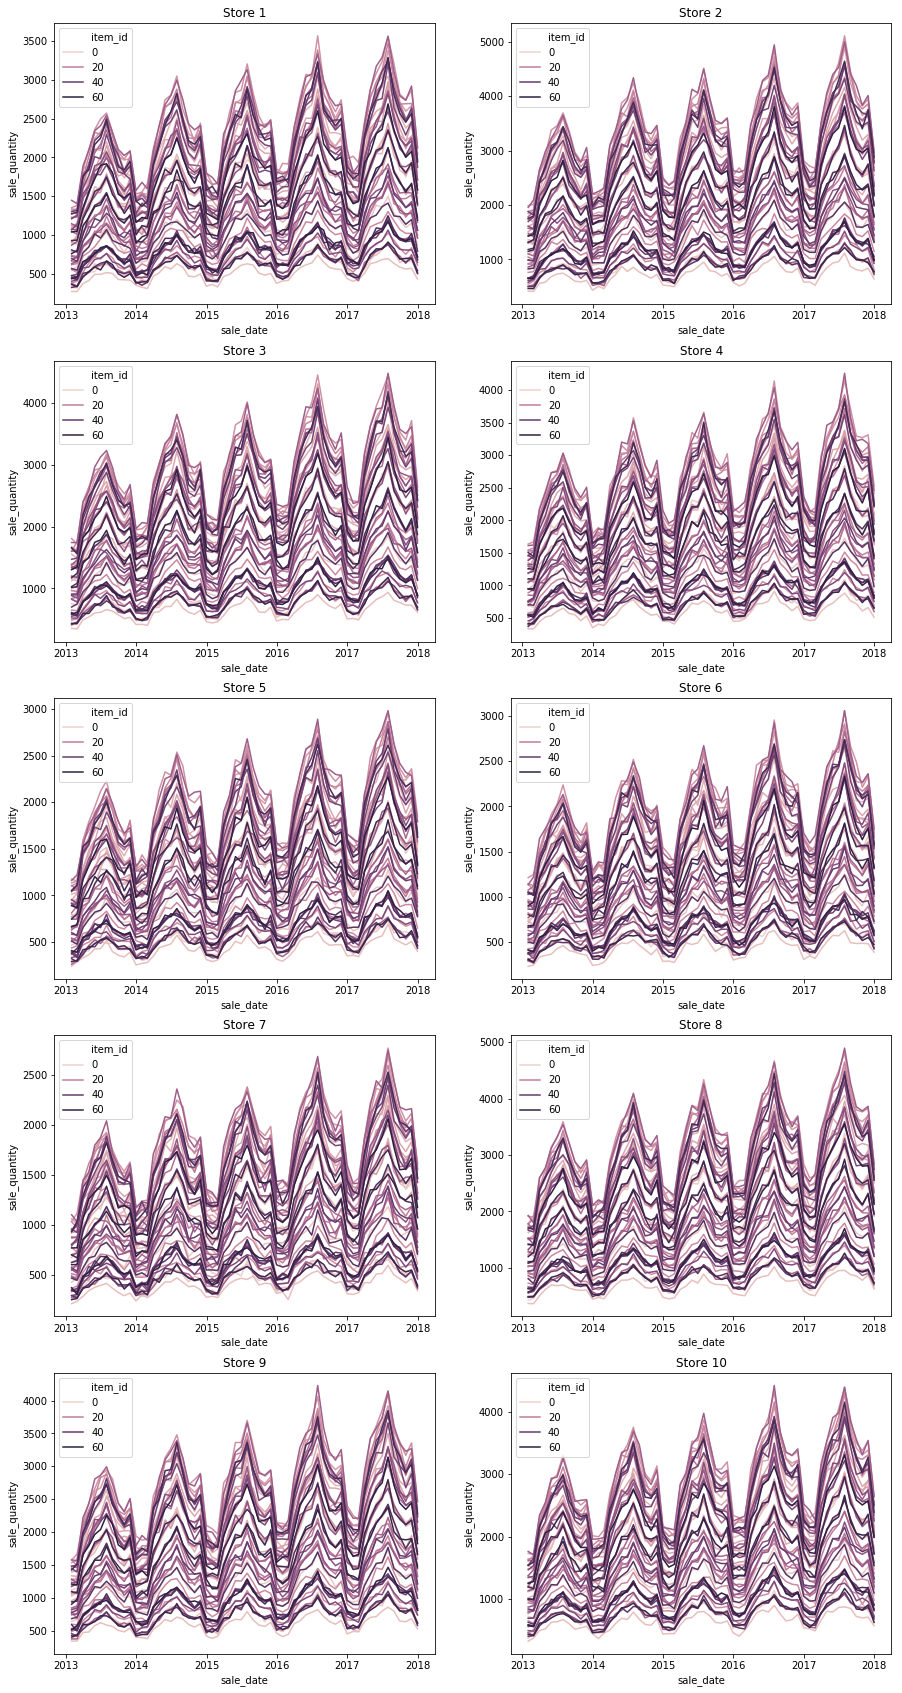

In [13]:
plt.figure(figsize=(15, 30))
# pal = sns.color_palette("muted", )

ts_plot_items = ft.partial(sns.lineplot, x="sale_date", y="sale_quantity", hue="item_id")  #, palette=pal)

stores = df_items.store_id.unique()
for i, store in enumerate(stores):
    plt.subplot(5, 2, i + 1)
    df_items = df.groupby(["item_id", "store_id"]).resample("M").sale_quantity.sum().reset_index()
    df_items_for_store = df_items[df_items.store_id == store]
    plt.title(f"Store {store}")
    ts_plot_items(data=df_items_for_store)
plt.show()

In [14]:
# plt.figure(figsize=(15, 30))
# # pal = sns.color_palette("muted", )
# ts_plot_items = ft.partial(sns.lineplot, x="sale_date", y="sale_quantity", hue="item_id")  #, palette=pal)

# df_items = df.groupby(["item_id", "store_id"]).resample("M").sale_quantity.sum().reset_index()

# stores = df_items.store_id.unique()
# for i, store in enumerate(stores):
#     plt.subplot(5, 2, i + 1)
#     df_items_for_store = df_items[df_items.store_id == store]
#     df_top_five = df_items_for_store.groupby("item_id")
#     plt.title(f"Store {store}")
#     ts_plot_items(data=df_items_for_store)
# plt.show()